In [1]:
import numpy as np
import pandas as pd

In [2]:
my_df = pd.read_csv("HR_comma_sep.csv")
my_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Checking the shape of the dataframe
my_df.shape

(14999, 10)

In [4]:
# Checking for null values
my_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
# checking for number of unique values in the target
my_df.left.nunique()

2

In [6]:
# Calculating ratio of target to records
ratio = my_df['left'].nunique()/my_df.shape[0]
print(f'ratio = {np.round(ratio*100,2)} %')

ratio = 0.01 %


In [8]:
# Extracting the independent variable (inputs)
inputs = my_df.drop('left',axis='columns')
inputs

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [9]:
# Extracting the dependent variable (target)
target = my_df['left']
target

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

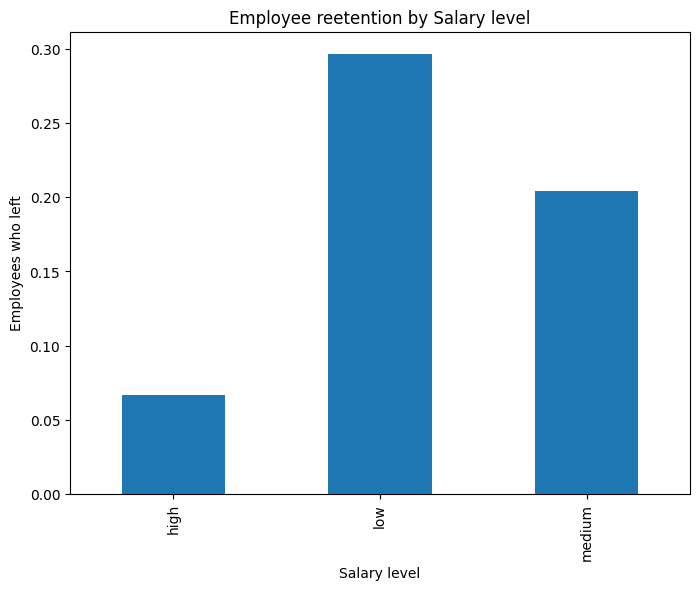

In [37]:
#plotting to see the impact of salary on employees who left
import pandas as pd 
from matplotlib import pyplot as plt
salary_retention = my_df.groupby('salary')['left'].mean()
plt.figure(figsize=(8,6))
salary_retention.plot(kind='bar')


plt.title('Employee reetention by Salary level')
plt.xlabel('Salary level')
plt.ylabel('Employees who left')
plt.show()

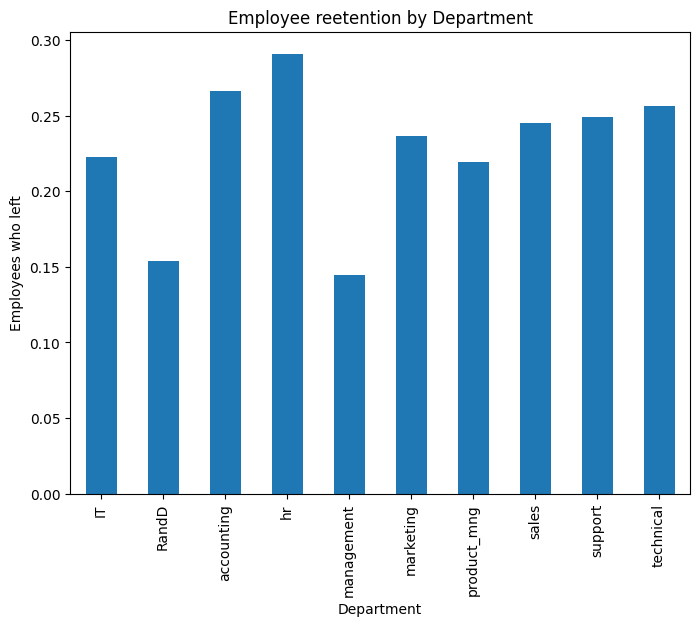

In [39]:
#plotting to see the correlation of employees who left based on departments
import pandas as pd 
from matplotlib import pyplot as plt
salary_retention = my_df.groupby('Department')['left'].mean()
plt.figure(figsize=(8,6))
salary_retention.plot(kind='bar')


plt.title('Employee reetention by Department')
plt.xlabel('Department')
plt.ylabel('Employees who left')
plt.show()

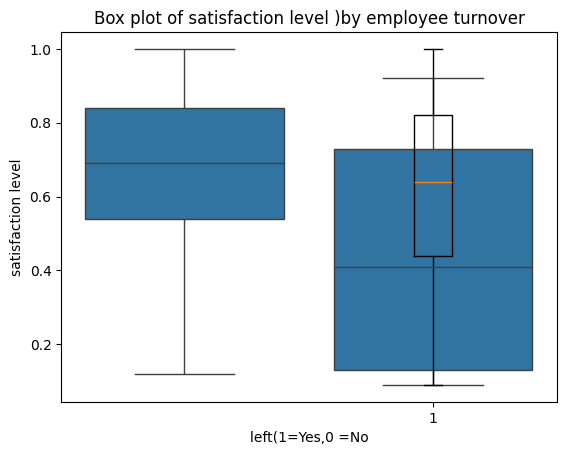

In [25]:
# Plotting the graph to see satisfaction level on employee retention
from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(x='left',y='satisfaction_level',data=my_df)
plt.boxplot(satisfaction_data)
plt.title('Box plot of satisfaction level )by employee turnover')
plt.xlabel('left(1=Yes,0 =No')
plt.ylabel('satisfaction level')
plt.show()

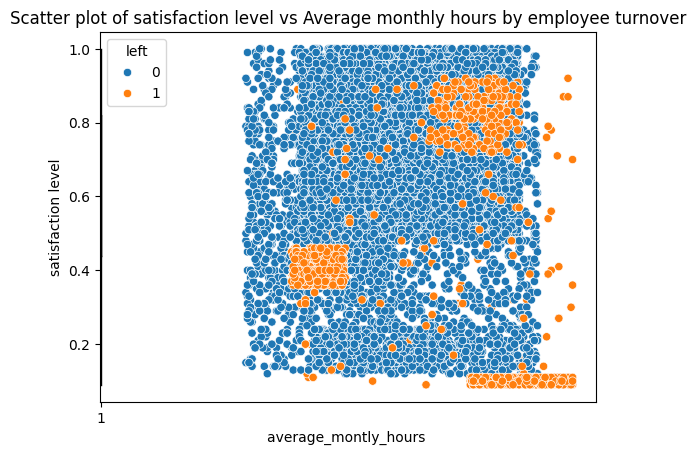

In [31]:
# Plotting the graph to see relationship between satisfaction level, avaerage monthly hours and employee retention
from matplotlib import pyplot as plt
import seaborn as sns
sns.scatterplot(x='average_montly_hours',y='satisfaction_level', hue='left',data=my_df)
plt.boxplot(satisfaction_data)
plt.title('Scatter plot of satisfaction level vs Average monthly hours by employee turnover')
plt.xlabel('average_montly_hours ')
plt.ylabel('satisfaction level')
plt.show()

In [10]:
# Checking the dataframe
my_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
# Checking possible numerical values (0, 1, 2)
set(my_df.Department)

{'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'}

In [12]:
# Transforming the word fields to numbers
from sklearn.preprocessing import LabelEncoder
le_Department = LabelEncoder()
le_salary = LabelEncoder()


In [13]:
inputs['Department_n'] = le_Department.fit_transform(inputs['Department'])
inputs['salary_n'] = le_salary.fit_transform(inputs['salary'])


In [14]:
inputs

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Department_n,salary_n
0,0.38,0.53,2,157,3,0,0,sales,low,7,1
1,0.80,0.86,5,262,6,0,0,sales,medium,7,2
2,0.11,0.88,7,272,4,0,0,sales,medium,7,2
3,0.72,0.87,5,223,5,0,0,sales,low,7,1
4,0.37,0.52,2,159,3,0,0,sales,low,7,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,8,1
14995,0.37,0.48,2,160,3,0,0,support,low,8,1
14996,0.37,0.53,2,143,3,0,0,support,low,8,1
14997,0.11,0.96,6,280,4,0,0,support,low,8,1


In [17]:
# Droping the Word columns
inputs_n = inputs.drop(['Department','salary'],axis='columns')
inputs_n

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_n,salary_n
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


In [18]:
target

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [19]:
# Importing the decision tree classifier
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [20]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
model = RandomForestClassifier()

In [21]:
# importing the train_test split
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
                                                inputs_n, target, train_size=0.8)

In [23]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
model.score(X_train, y_train)

1.0

In [25]:
model.score(X_test,y_test)

0.993

In [30]:
model.base_estimator_

C:\03_CHM SESSION JULY-DECEMBER 2024WISDOM CLASS\DATA SCIENCE-MACHINE LEARNING\myenv_dscience\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `base_estimator_` was deprecated in version 1.2 and will be removed in 1.4. Use `estimator_` instead.
  warnings.warn(msg, category=FutureWarning)


DecisionTreeClassifier()

In [30]:
model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1082997487),
 DecisionTreeClassifier(max_features='sqrt', random_state=1120595669),
 DecisionTreeClassifier(max_features='sqrt', random_state=2066005829),
 DecisionTreeClassifier(max_features='sqrt', random_state=493995450),
 DecisionTreeClassifier(max_features='sqrt', random_state=1392896422),
 DecisionTreeClassifier(max_features='sqrt', random_state=958341518),
 DecisionTreeClassifier(max_features='sqrt', random_state=1716198159),
 DecisionTreeClassifier(max_features='sqrt', random_state=2035650279),
 DecisionTreeClassifier(max_features='sqrt', random_state=1212250145),
 DecisionTreeClassifier(max_features='sqrt', random_state=485267047),
 DecisionTreeClassifier(max_features='sqrt', random_state=1368269811),
 DecisionTreeClassifier(max_features='sqrt', random_state=1543284739),
 DecisionTreeClassifier(max_features='sqrt', random_state=679023442),
 DecisionTreeClassifier(max_features='sqrt', random_state=37715824),
 DecisionTre

In [31]:
len(model.estimators_)

100

In [48]:
#using Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [53]:
X=my_df[['salary']]
y=my_df['left']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
                                                inputs_n, target, train_size=0.2,random_state=42)

In [55]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [56]:
y_pred =model.predict(X_test)

In [57]:
model.score(X_train, y_train)

0.7619206402134044

In [58]:
model.score(X_test,y_test)

0.76525

In [ ]:
#Comments
#From my above exercise,the decision tree classifier gave a better training and test score against the logistic regression. I noticed that the satisfaction_level had a lot in employee retention.